In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
glass=pd.read_csv('C:/Users/NAMRATA/Downloads/DATA SCIENCE/ASSIGNMENT/KNN/glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
np.unique(glass['Type'])

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [4]:
x=glass.iloc[:,:9]
y=glass.iloc[:,9]

In [5]:
# Splitting data into training and testing data set

In [6]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.33,random_state=0)
x_train.shape,y_train.shape, x_test.shape,y_test.shape

<IPython.core.display.Javascript object>

((143, 9), (143,), (71, 9), (71,))

Finding the optimal K value for KNN model by gridsearch method

In [7]:
n_neighbors = np.array(range(1,41))
param_grid = dict(n_neighbors=n_neighbors)

In [9]:
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])})

In [10]:
print(grid.best_score_)
print(grid.best_params_)

0.7147783251231526
{'n_neighbors': 1}


In [ ]:
# KNN model with K = 6

In [11]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [12]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

1    35
2    24
7     6
5     3
3     2
6     1
dtype: int64

In [13]:
pd.crosstab(y_test,preds)

col_0,1,2,3,5,6,7
Type,,,,,,
1,20,4,1,0,0,0
2,7,19,0,1,0,0
3,7,0,1,0,0,0
5,0,0,0,2,0,0
6,0,1,0,0,1,0
7,1,0,0,0,0,6


In [14]:
# We got  accuracy of 69% for our model

In [15]:
np.mean(preds==y_test)

0.6901408450704225

ploting graph of accuracy with the k values we use

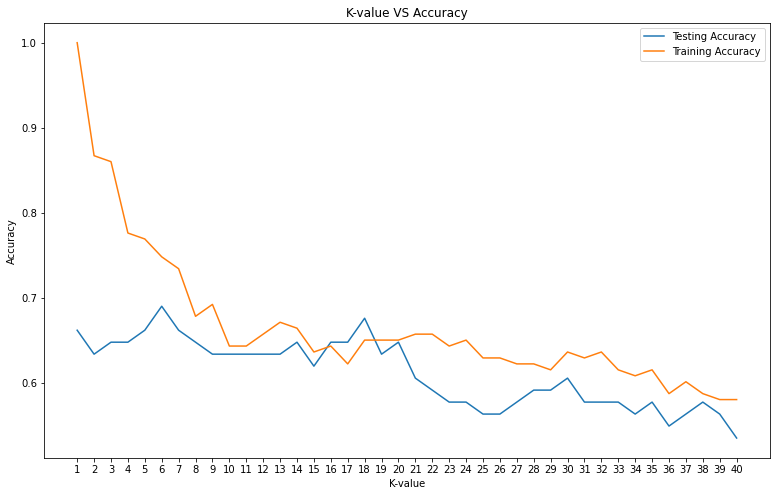

Best accuracy is 0.6901408450704225 with K = 6


In [16]:
import matplotlib.pyplot as plt 
%matplotlib inline
k_values = np.arange(1,41)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

    # Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('K-value VS Accuracy')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.xticks(k_values)

plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

Best accuracy is 0.6901408450704225 with K = 6
In the above graph we can see even if we use k=1 (Best score according to gridsearch method) there will be big difference of accuracy between train and test data as this is overfit problem.

so, we are using k=6 which gives optimum results for both train and test data which will not cause overfit problem. </b>